<a href="https://colab.research.google.com/github/jakelaporte/MathematicalModeling/blob/master/Lsn09_Optimization_Practice.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

***
***
# ============================================================
# Nonlinear and Linear Optimization in R
# ============================================================
***
***
The following information is to help you understand how to execute the **Solve** step in the class given an optimization problem from block 1. This ```R notebook``` assumes that you have already completed the **Transform** step of the modeling process and focuses solely on the **Solve** step.<br>
Once you have transformed the problem, determine the following:
- Is the problem a single variable or multivarible problem? 
- Is it a nonlinear or linear objective function? 
- What type of constraints do you have - Nonlinear, Equality; Nonlinear, Inequality; Linear, Equality; Linear Inequality?

This ```R Notebook``` contains the "how to" for each of the possible optimization problems along with the graphical interpretation of the problem and how you would use ```R``` to visualize it. Obviously, if we have too many decision variables, it could be impossible to visualize. 

***
## Single Variable Optimization ###
***
$$ \max_{x}{(0.65-0.01x)(200+5x)-0.45x}$$
If you have not already figured it out, ```optim``` will solve most single variable optmization problems. The techniques that we have learned in class will solve all of them. ```optim``` is a base ```R``` function so no library is needed to call it. It does however require that you are solving for a minimum, so in this case we multiply the objective function by -1.
```R
f = function(x){((0.65−0.01*x)*(200+5*x)−0.45*x)*(-1)}
x=1
optim(x,f)
```

In [0]:
options(warn=-1)
f = function(x){((0.65−0.01*x)*(200+5*x)−0.45*x)*(-1)}
x=1 #starting value
ans=optim(x,f)
print(ans)

$par
[1] 8.1

$value
[1] -133.1995

$counts
function gradient 
      20       NA 

$convergence
[1] 0

$message
NULL



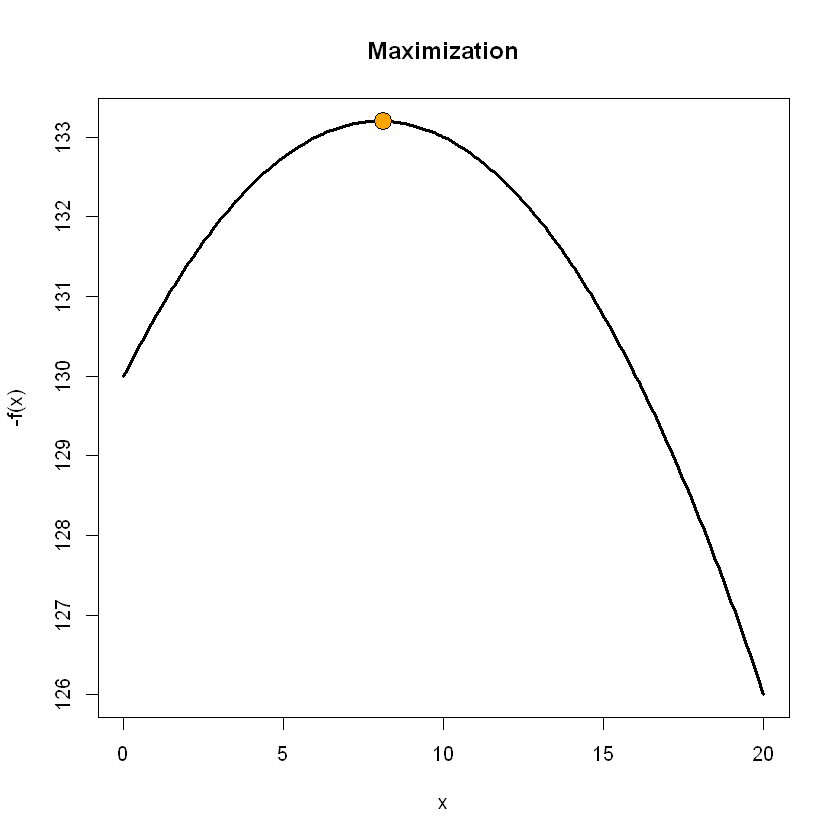

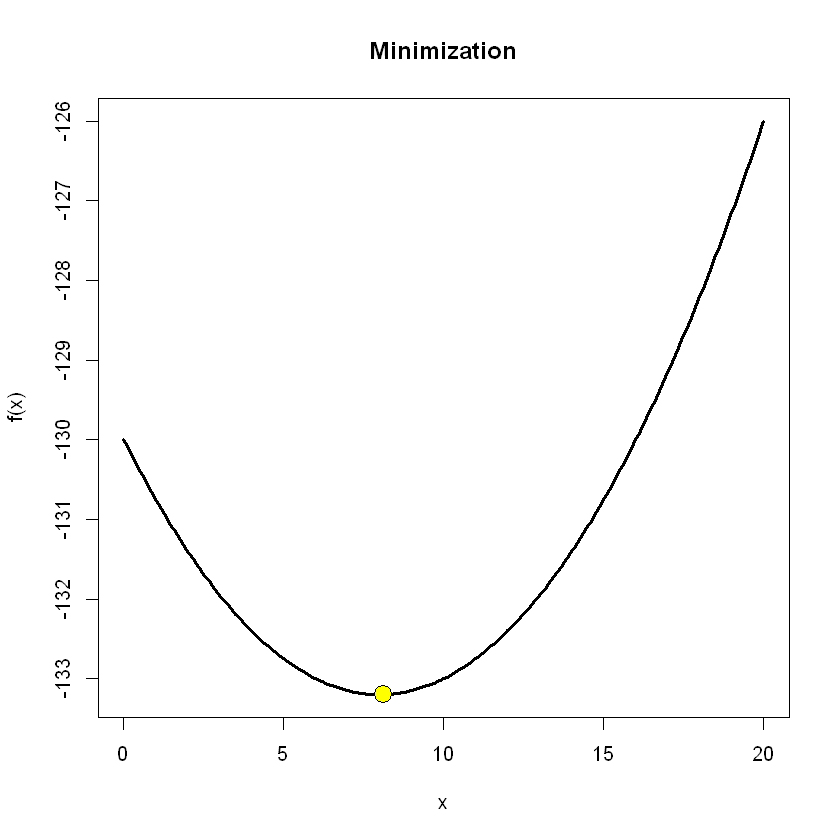

In [0]:
x = seq(0,20,0.1)
plot(x,-f(x),type="l",lwd=3,col="black",main="Maximization")
points(ans$par,-f(ans$par),pch=21,bg="orange",cex=2)
plot(x,f(x),type="l",lwd=3,col="black",main="Minimization")
points(ans$par,f(ans$par),pch=21,bg="yellow",cex=2)

The graphs above show that the optimization occurs at the same place for a $\max_{x}{-f(x)}$ and a $\min_{x}{f(x)}$. Here, both occur at $x=8.1$.

***
## Multivariable Unconstrained Optimization
***
$$ \max_{x_1,x_2}{(339-0.01x_1-0.003x_2)x_1+(399-0.004x_1-0.01x_2)x_2-(400,000+195x_1+225x_2)} $$
Again, the gameplan for an unconstrained optimization should be to use ```optim```. Ensure that you are minimizing the function (multiply by a -1 for max problems).

In [0]:
P = function(x){
    return(((339-0.01*x[1]-0.003*x[2])*x[1]
           +(399-0.004*x[1]-0.01*x[2])*x[2]
           -(400000+195*x[1]+225*x[2]))*-1)
}
x=c(500,500) #starting point for optimization
ans = optim(x,P,method="BFGS") #BFGS is a numerical technique used to incrementally calculate the Hessian for Newton
print(ans)

$par
[1] 4735.043 7042.735

$value
[1] -553641

$counts
function gradient 
       8        5 

$convergence
[1] 0

$message
NULL



#### Interpret the Solution 
In order to maximize this problem, $x_1=4735, x_2=7043$ with $P(4735,7043)=553,641$. We would use this information to answer the question in terms of what $x_1$, $x_2$, and $P(x_1,x_2)$ actually stood for in the problem. 

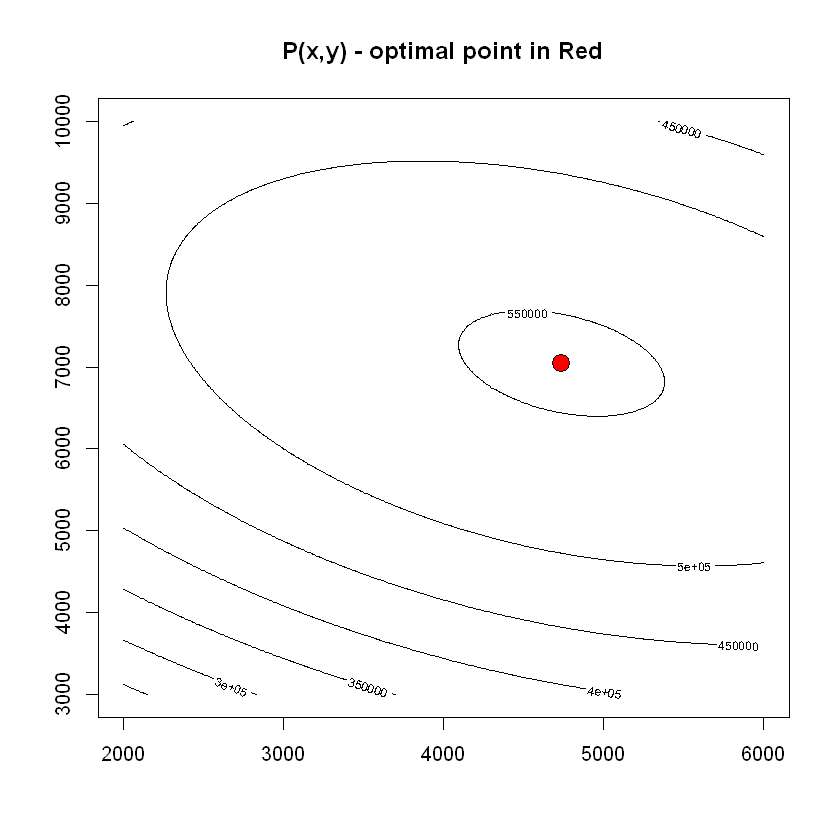

In [0]:
library(ma391laporte)#Outer function
X = list(x=seq(2000,6000,10),y=seq(3000,10000,10))
Z = Outer(P,X)
## contour plot ##
contour(X$x,X$y,-Z, main="P(x,y) - optimal point in Red")
points(ans$par[1],ans$par[2],pch=21,bg="red",cex=2)

***
## Multivariable Constrained Optimization  / Nonlinear Equality Constraint
***
$$ \max_{x_1,x_2}{x_1(600-3x_1+x_2)+x_2(800-2x_2+x_1)} $$
$$\text{s.t. }(x_1-300)^2+(x_2-300)^2=200^2$$

Libraries Needed: MASS, NlcOptim<br>
Let's get an idea of what the objective function and constraint look like.

In [0]:
obj = function(x){((600-3*x[1]+x[2])*x[1]+(800-2*x[2]+x[1])*x[2])*(-1)}

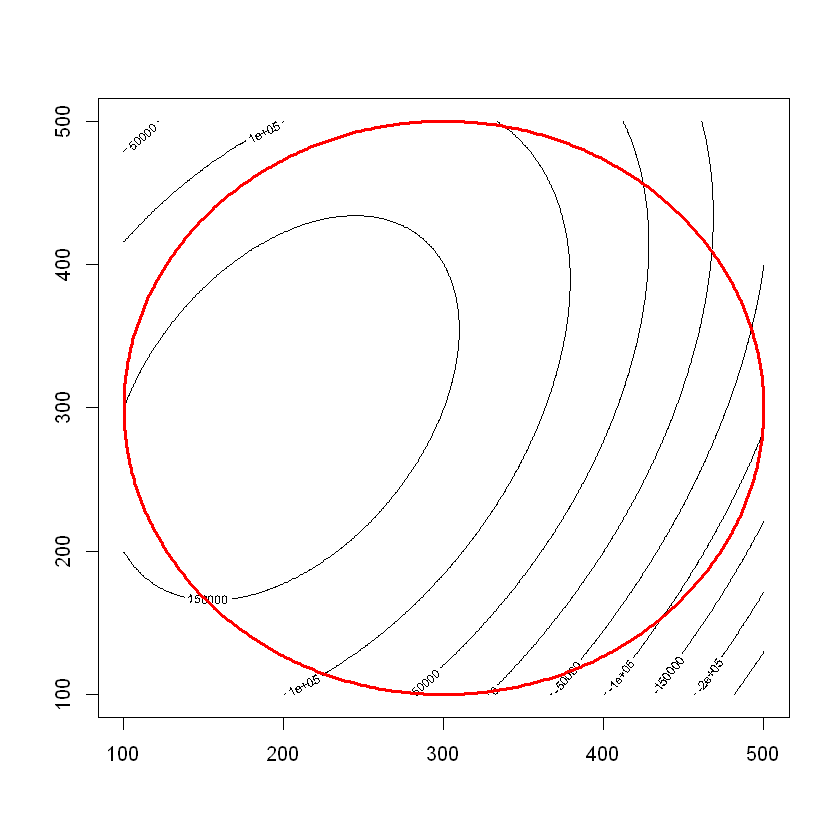

In [0]:
library(ma391laporte)
X = list(x=seq(100,500),y=seq(100,500))
Z = Outer(obj,X)
## contour plot ##
contour(X$x,X$y,-Z)

## Parametric Equations for the constraint ##
r = function(t){c(200*sin(t)+300,200*cos(t)+300)}
r = Vectorize(r)

## Get the points for the function and plot the points on the graph
t = seq(0,2*pi,0.01)
Xt = list(x=r(t)[1,],y=r(t)[2,])
points(Xt$x,Xt$y,type="l",col="red",lwd=3)

#### Use ```solnl``` to find solve the optimization
In the case of a nonlinear equality constraint(s), we use the same setup the ```con``` function below will return a list of nonlinear equality functions that equal 0. For this problem, we subtract the right hand side of the equation (200) to set up the equation to equal 0,<br><br>
$$ \underbrace{(x_1-300)^2+(x_2-300)^2-200^2}_{\text{use this in the rbind}}=0$$<br>
the ```solnl``` function expects that all of the equations that we rbind are all equal to zero.

In [0]:
library(MASS);library(NlcOptim)
x0 = c(300,500)
## Single nonlinear constraint ##
con = function (x){
    f = NULL
    f = rbind(f,(x[1]-300)^2+(x[2]-300)^2-200^2)
    return(list(ceq=f,c=NULL))
}
ans=solnl(x0,objfun=obj,confun=con)
print(ans)

$par
         [,1]
[1,] 116.2227
[2,] 221.0956

$fn
[1] -159713.1

$counts
     nfval ngval
[1,]   116    28

$lambda
$lambda$lower
     [,1]
[1,]    0
[2,]    0

$lambda$upper
     [,1]
[1,]    0
[2,]    0

$lambda$eqnonlin
[1] 0.938242


$grad
          [,1]
[1,] -344.8552
[2,] -148.0627

$hessian
         [,1]     [,2]
[1,] 5.603232 1.189552
[2,] 1.189552 7.672655



#### Interpret the Solution
Given the feasible region of the circle, the decision variables that satisfy this constraint and maximize the objective function are $x_1=116.22$ and $x_2=221.10$ with an objective function value of $159,713.1$ in terms of what each of these quantities represent from the original problem. To see this on the contour plot, simply redraw all of the contour plot and circle from above and add the point $(116.22, 221.10)$ or from the ```R code```, ```ans$par```. As you can see below, we plotted the point in yellow and it appears on the red constraint while maximizing the objective function for all points on the red circle.

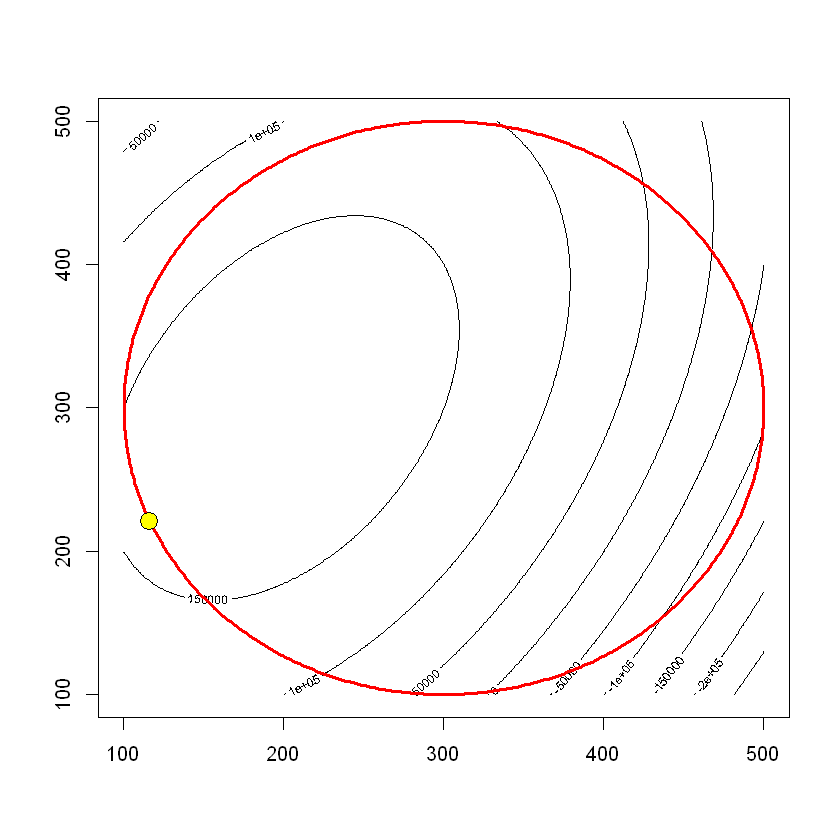

In [0]:
contour(X$x,X$y,-Z)
points(Xt$x,Xt$y,type="l",col="red",lwd=3)
points(ans$par[1],ans$par[2],pch=21,bg="yellow",cex=2)

### Multivariable Constrained Optimization  / Linear Equality Constraint
$$ \max_{x_1,x_2}{x_1(600-3x_1+x_2)+x_2(800-2x_2+x_1)} $$
$$\text{s.t. }12x_1+5x_2=5000$$

For a 2-decision variable problem, we will only have one equality constraint, otherwise it will not be an optimization. This was discussed in a previous R notebook, but the basic idea is that if there are two equality constraints (assuming they are different), then the feasible region would most likely be a single point and the objective function would not be needed. <br><br>
Let's solve this problem first (to go along with the theme of this notebook) and then use another objective function with more decision variables to explain how to find the solution using ```solnl``` in the context of a larger problem.
Libraries Needed: MASS, NlcOptim<br><br>
Here is the picture of the objective function with the constraint in red.

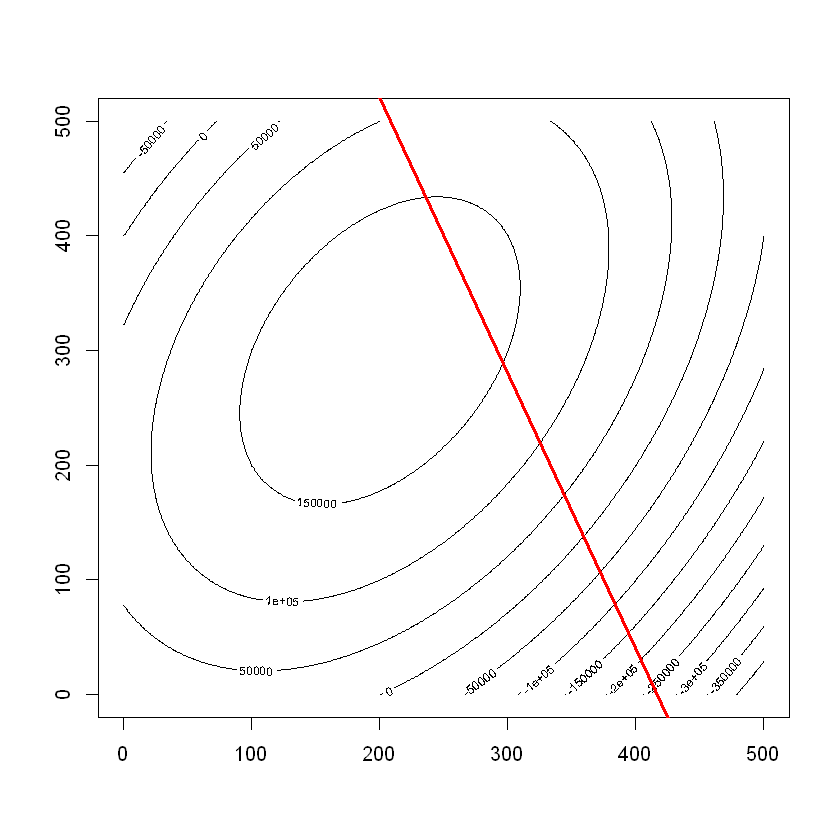

In [0]:
obj = function(x){((600-3*x[1]+x[2])*x[1]+(800-2*x[2]+x[1])*x[2])*(-1)}
X = list(x=seq(0,500),y=seq(0,500))
Z = Outer(obj,X)
## contour plot ##
contour(X$x,X$y,-Z)
abline(a=1000,b=-12/5,col="red",lwd=3) # see the notes from class on the abline

#### Set up the linear equality constraint 
In the ```solnl``` function, there is a place to put linear equality constraints. They are placed in two matrices called ```Aeq``` and ```Beq```. These matrices are found using the constraints and matrices. Suppose our constraints (for a larger problem) were as follows:<br><br>
$$ 3x_1-5x_2+2x_3+7x_4 = 300$$
$$ 2x_1+12x_2+2x_3-x_4 = 200$$<br>
This leads to the following matrix notation of the constraints:<br><br>
$$\begin{bmatrix}3&-5&2&7\\2&12&2&-1\end{bmatrix}\begin{bmatrix}x_1\\x_2\\x_3\\x_4\end{bmatrix}=\begin{bmatrix}300\\200\end{bmatrix}$$<br>
This is the setup that we want to use for ```Aeq``` and ```Beq```. 
$$\text{Aeq}=\begin{bmatrix}3&-5&2&7\\2&12&2&-1\end{bmatrix}$$<br>
$$\text{Beq}=\begin{bmatrix}300\\200\end{bmatrix}$$<br>
In ```R``` the code looks like this:
```R
#byrow = TRUE in a matrix allows the input to be a row at a time instead of a column#
Aeq = matrix(c(3,-5,2,7,2,12,2,-1),nrow=2,byrow=TRUE)
print(Aeq)
Beq = matrix(c(300,200))
print(Beq)
```

In [0]:
Aeq = matrix(c(3,-5,2,7,2,12,2,-1),nrow=2,byrow=TRUE)
print(Aeq)
Beq = matrix(c(300,200))
print(Beq)

     [,1] [,2] [,3] [,4]
[1,]    3   -5    2    7
[2,]    2   12    2   -1
     [,1]
[1,]  300
[2,]  200


#### Solve this problem using ```Aeq``` and ```Beq```
For the problem in this section, our constraints are simpler and converted to matrix notation look like this:
$$\begin{bmatrix}12&5\end{bmatrix}\begin{bmatrix}x_1\\x_2\end{bmatrix}=\begin{bmatrix}5000\end{bmatrix}$$<br>
so,

$$\text{Aeq}=\begin{bmatrix}12&5\end{bmatrix}$$
$$\text{Beq}=\begin{bmatrix}5000\end{bmatrix}$$<br>

Use these matrices and the ```solnl``` command to solve this problem.

$par
         [,1]
[1,] 266.0455
[2,] 361.4907

$fn
[1] -167474.1

$counts
     nfval ngval
[1,]    13     5

$lambda
$lambda$lower
     [,1]
[1,]    0
[2,]    0

$lambda$upper
     [,1]
[1,]    0
[2,]    0

$lambda$eqlin
[1] 22.77433


$grad
         [,1]
[1,] 273.2920
[2,] 113.8716

$hessian
          [,1]      [,2]
[1,]  3.910910 -2.870454
[2,] -2.870454  3.637311



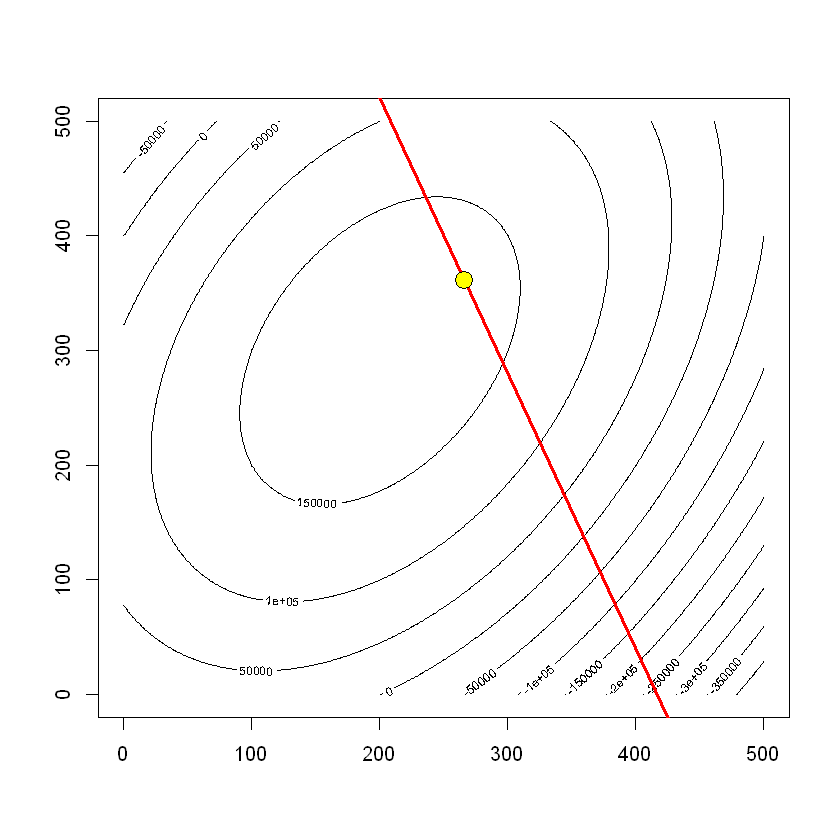

In [0]:
## Replot the contour plot so that we can put the answer on it.
contour(X$x,X$y,-Z)
abline(a=1000,b=-12/5,col="red",lwd=3)

## Aeq and Beq are the Aeq*x = Beq ##
Aeq = matrix(c(12,5),nrow=1)
Beq = matrix(5000)
x0=c(0,500)
ans=solnl(x0,objfun = obj,Aeq=Aeq,Beq=Beq)
print(ans)
## Put the answer on the contour plot as a point in green
points(ans$par[1],ans$par[2],pch=21,bg="yellow",cex=2)

### Multivariable Constrained Optimization  / Linear Inequality Constraints
$$ \max_{x_1,x_2}{x_1(600-3x_1+x_2)+x_2(800-2x_2+x_1)} $$
$$\text{s.t. }12x_1+5x_2\le5000$$
$$x_1\ge0$$
$$x_2\ge0$$
Inequality constraints need to be put into a matrix as $\le$ or $<$. This is done by multiplying the constraints with $>$ and $\ge$ by -1. In this case the constraints would become the following:
$$12x_1+5x_2\le5000$$
$$-x_1\le0$$
$$-x_2\le0$$
which leads to the following matrix notation: $A\vec{x}\le B$:
$$\begin{bmatrix}12&5\\-1&0\\0&-1\end{bmatrix}\begin{bmatrix}x_1\\x_2\end{bmatrix} \le \begin{bmatrix}5000\\0\\0\end{bmatrix}$$<br>
In ```solnl``` command, we set these matrices equal to ```A``` and ```B``` instead of the ```Aeq``` and ```Beq``` from the previous section because these are inequality constraints.
```R
A = matrix(c(12,5,-1,0,0,-1),nrow=3,byrow=T)
B = matrix(c(5000,0,0),nrow=3)
```

In [0]:
A = matrix(c(12,5,-1,0,0,-1),nrow=3,byrow=T)
B = matrix(c(5000,0,0),nrow=3)
print(A)
print(B)

     [,1] [,2]
[1,]   12    5
[2,]   -1    0
[3,]    0   -1
     [,1]
[1,] 5000
[2,]    0
[3,]    0


Use the matrices to and ```solnl``` to solve this problem.

$par
     [,1]
[1,]  200
[2,]  300

$fn
[1] -180000

$counts
     nfval ngval
[1,]    26     9

$lambda
$lambda$lower
     [,1]
[1,]    0
[2,]    0

$lambda$upper
     [,1]
[1,]    0
[2,]    0

$lambda$ineqlin
[1] 0 0 0


$grad
              [,1]
[1,]  0.0012565105
[2,] -0.0004752604

$hessian
          [,1]      [,2]
[1,]  5.970067 -1.962824
[2,] -1.962824  3.950412



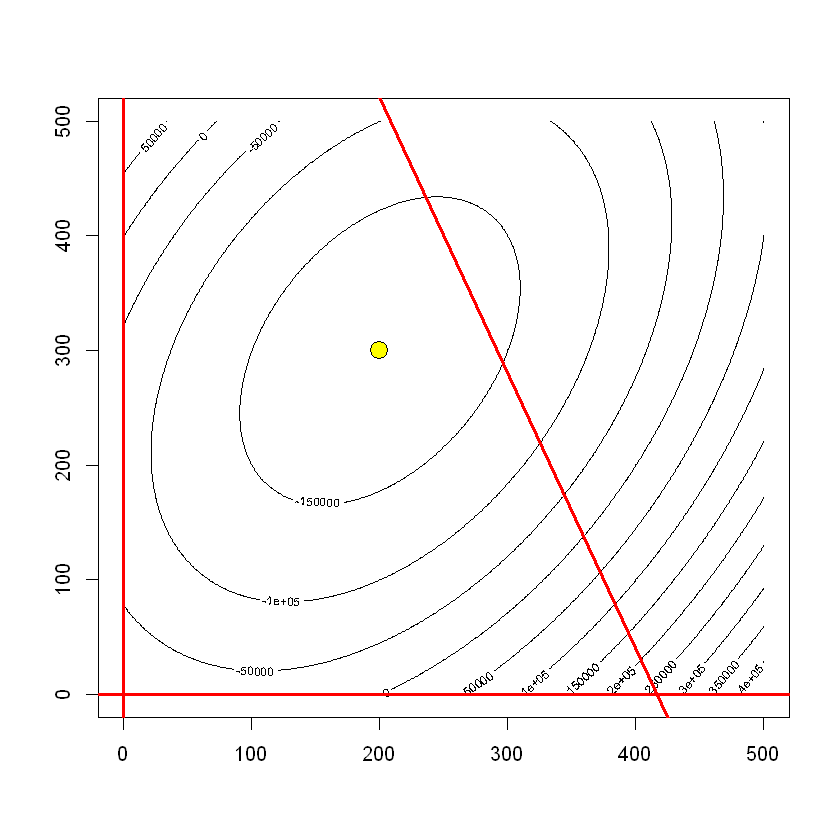

In [0]:
obj = function(x){((600-3*x[1]+x[2])*x[1]+(800-2*x[2]+x[1])*x[2])*-1}
X = list(x=seq(0,500),y=seq(0,500))
Z = Outer(obj,X)
contour(X$x,X$y,Z)
abline(a=1000,b=-12/5,col="red",lwd=3)
abline(h=0,col="red",lwd=3)
abline(v=0,col="red",lwd=3)
A = matrix(c(12,5,-1,0,0,-1),nrow=3,byrow=T)
B = matrix(c(5000,0,0),nrow=3)
ans = solnl(x0,objfun = obj,A=A,B=B)
print(ans)
points(ans$par[1],ans$par[2],pch=21,bg="yellow",cex=2)

#### Understanding the solution, comparing it with the answer in the previous section
Understand that the answer to the nonlinear optimization problem occurs within the feasible region and not on the feasible region, which implies that none of the constraints are binding. This is what using ```A=,B=``` allows in the ```solnl``` command - the answer can occur within the bounded feasible region, instead of only on the constraints. Let's change the problem slightly to discover when these would give the same solution.

***
# ==================================================
# ========  Homework Lesson 9  ========================
# ==================================================
***
#### Problem 1 (Equality Constraints)
$$ \max_{x_1,x_2}{x_1(600-3x_1+x_2)+x_2(800-2x_2+x_1)} $$
$$\text{s.t. }12x_1+5x_2=2500$$
#### Problem 2 (Inequality Constraints)
$$ \max_{x_1,x_2}{x_1(600-3x_1+x_2)+x_2(800-2x_2+x_1)} $$
$$\text{s.t. }12x_1+5x_2\le2500$$
$$x_1\ge0$$
$$x_2\ge0$$
#### Problem 3: Explain why did prob1,2 give the same solution and we got different answers in the two sections above?
#### Problem 4: Create a contour plot with constraints for problems 1,2.
#### Problem 5
$$ \max_{x,y}{x(10+22x^{-0.5}+1.3y^{-0.1})-18x+y(5+15y^{-0.5}+0.8x^{-0.08})-10y} $$
#### Problem 6 - Find the solution and plot the contour of the objective unction, the constraints and the solution.
$$ \max_{x,y}{x(10+22x^{-0.5}+1.3y^{-0.1})-18x+y(5+15y^{-0.5}+0.8x^{-0.08})-10y} $$
$$ \text{s.t. }2x+3y\le18$$
$$ x\ge3$$
$$ y\ge2$$
#### Problem 7 - Find the solution and plot the contour of the objective unction, the constraints and the solution.
$$ \max_{x,y}{x(10+22x^{-0.5}+1.3y^{-0.1})-18x+y(5+15y^{-0.5}+0.8x^{-0.08})-10y} $$
$$ \text{s.t. }50x+100y\ge600$$
$$ x\le7$$
$$ y\le5$$
#### Problem 8 - Find the solution (you will need to define ```A```,```B```, ```Aeq```, and ```Beq``` for this one).
$$ \max_{x,y}{x(10+22x^{-0.5}+1.3y^{-0.1})-18x+y(5+15y^{-0.5}+0.8x^{-0.08})-10y} $$
$$ \text{s.t. }2x+3y+s_1=18$$
$$ -x+s_2=3$$
$$ -y+s_3=2$$
$$s_1\ge0$$
$$s_2\ge0$$
$$s_3\ge0$$